In [103]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [205]:
vino=pd.read_csv('/content/WineQT.csv')

In [105]:
vino


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [206]:
X=vino.drop('quality',axis=1)
y=vino['quality']

In [207]:
X=vino.drop('Id',axis=1)

In [208]:
X=X.drop('quality',axis=1)

In [209]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [210]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [211]:
X_scaled

array([[-0.52157961,  0.93933222, -1.36502663, ...,  1.27069495,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.70892755,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.32577481,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.88754221,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  1.33455374,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  1.65384769,
         0.30701583, -0.22382033]])

In [212]:
#método del codo
from sklearn.cluster import KMeans

In [213]:
#distancias de cada dato al centroide
inertias=[]
rango=range(1,11)
for k in rango:
  km=KMeans(n_clusters=k,random_state=42)
  km.fit(X_scaled)
  inertias.append(km.inertia_)



In [114]:
import matplotlib.pyplot as plt

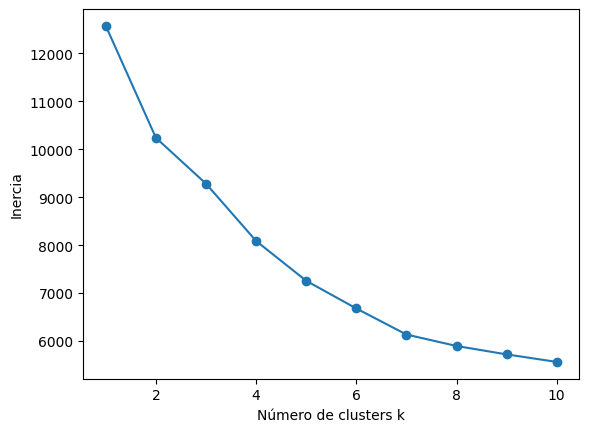

In [214]:
plt.plot(rango,inertias,marker='o')
plt.xlabel('Número de clusters k')
plt.ylabel('Inercia')
plt.show()

In [215]:
df=pd.DataFrame()

In [248]:
k=3
km=KMeans(n_clusters=k,random_state=42)
#labelsx=km.fit(X_scaled)
#erorr estaba aquí
#df['Cluster']=labels.labels_
labels = km.fit_predict(X_scaled)
df['Cluster'] = labels




In [249]:
df

,Cluster,PCA1,PCA2,Type
0,1,-1.561545,0.444892,Wine
1,1,-0.760892,1.915058,Wine
2,1,-0.708085,0.914423,Wine
3,0,2.308166,-0.224448,Wine
4,1,-1.561545,0.444892,Wine
...,...,...,...,...
1138,1,-1.442233,0.332152,Wine
1139,1,-1.222998,0.921618,Wine
1140,1,-2.124635,0.873804,Wine
1141,1,-2.208536,0.928343,Wine


In [229]:
X_scaled
dfx=pd.DataFrame(X_scaled,columns=X.columns)
dfx

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382
...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.151292,-0.118842,-0.703785,-0.171289,-0.231395,1.306316,-0.180503,-0.514707,0.695966,0.541862,0.515741
1139,-0.865059,0.493785,-0.958109,-0.466421,-0.400719,1.208717,-0.241539,-0.114545,0.695966,0.952843,-0.870937
1140,-1.208538,0.382399,-0.958109,-0.392638,0.064922,1.599113,-0.058432,-0.951246,0.887542,-0.456235,0.053515
1141,-1.380278,0.103932,-0.856379,-0.245072,-0.527712,2.282306,0.155192,-0.836914,1.334554,0.600574,0.700632


In [230]:
df.value_counts()

,count
Cluster,
1,724
0,400
2,19


In [231]:
centroids_scaled = km.cluster_centers_
centroids_scaled

array([[ 0.94550617, -0.68141437,  0.98441632,  0.27638979, -0.0167765 ,
        -0.23916507, -0.23604579,  0.52529662, -0.63213735,  0.38348766,
         0.24295081],
       [-0.52497962,  0.37589843, -0.58231363, -0.14300896, -0.1498316 ,
         0.13142015,  0.11592787, -0.29510176,  0.39572368, -0.30767168,
        -0.10983866],
       [ 0.09909343,  0.02185728,  1.4646599 , -0.36933841,  6.06256206,
         0.02725466,  0.5519232 ,  0.18605407, -1.77100006,  3.65048567,
        -0.92932306]])

In [232]:
centroids_original = scaler.inverse_transform(centroids_scaled)

In [233]:
centroids_df = pd.DataFrame(centroids_original, columns=X.columns)
centroids_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,9.962750,0.408987,0.461900,2.906750,0.086140,13.165000,38.180000,0.997741,3.212025,0.723025,10.704917
1,7.394061,0.598833,0.153881,2.338329,0.079854,16.962017,49.713398,0.996163,3.372983,0.605304,10.323297
2,8.484211,0.535263,0.556316,2.031579,0.373368,15.894737,64.000000,0.997088,3.033684,1.279474,9.436842


In [234]:
centroids_df['Cluster'] = centroids_df.index


In [235]:
centroids_df['Cluster']

,Cluster
0,0
1,1
2,2


In [236]:
pca = PCA(n_components=2, random_state=42)


In [237]:
X_pca = pca.fit_transform(X_scaled)

Text(0, 0.5, 'PCA 2')

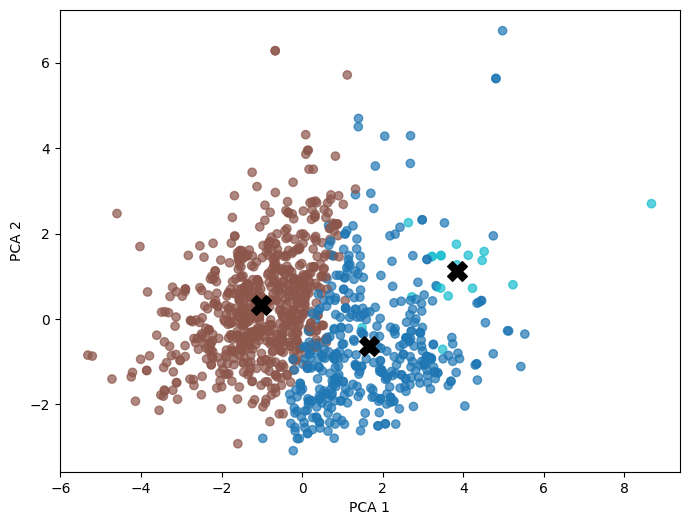

In [250]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10', alpha=0.7)
centroids_pca = pca.transform(centroids_scaled)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1],
            c='black', marker='X', s=200, label='Centroides')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [241]:
import plotly.express as px

In [243]:
centroids_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Cluster
0,9.962750,0.408987,0.461900,2.906750,0.086140,13.165000,38.180000,0.997741,3.212025,0.723025,10.704917,0
1,7.394061,0.598833,0.153881,2.338329,0.079854,16.962017,49.713398,0.996163,3.372983,0.605304,10.323297,1
2,8.484211,0.535263,0.556316,2.031579,0.373368,15.894737,64.000000,0.997088,3.033684,1.279474,9.436842,2


In [245]:
import plotly.express as px
import matplotlib.pyplot as plt

df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

centroids_df['PCA1'] = centroids_pca[:,0]
centroids_df['PCA2'] = centroids_pca[:,1]

# Datos y centroides en uno solo para graficar
df['Type'] = 'Wine'
centroids_df['Type'] = 'centroid'

plot_df = pd.concat([
    df[['PCA1', 'PCA2', 'Cluster', 'Type']],
    centroids_df[['PCA1', 'PCA2', 'Cluster', 'Type']]
])

# Gráfico interactivo
fig = px.scatter(
    plot_df,
    x='PCA1', y='PCA2',
    color='Cluster',
    symbol='Type',
    hover_data=['Type', 'Cluster'],
    labels={'PCA1': 'PCA 1', 'PCA2': 'PCA 2'}
)

fig.show()

In [177]:
df

,cluster,PCA1,PCA2,Type
0,1,-1.561545,0.444892,Wine
1,1,-0.760892,1.915058,Wine
2,1,-0.708085,0.914423,Wine
3,0,2.308166,-0.224448,Wine
4,1,-1.561545,0.444892,Wine
...,...,...,...,...
1138,1,-1.442233,0.332152,Wine
1139,1,-1.222998,0.921618,Wine
1140,1,-2.124635,0.873804,Wine
1141,1,-2.208536,0.928343,Wine


In [172]:
plot_df

,PCA1,PCA2,cluster,Type,Cluster
0,-1.561545,0.444892,1.0,Wine,NaN
1,-0.760892,1.915058,1.0,Wine,NaN
2,-0.708085,0.914423,1.0,Wine,NaN
3,2.308166,-0.224448,0.0,Wine,NaN
4,-1.561545,0.444892,1.0,Wine,NaN
...,...,...,...,...,...
1141,-2.208536,0.928343,1.0,Wine,NaN
1142,-2.241733,1.003189,1.0,Wine,NaN
0,1.664729,-0.628853,NaN,centroid,0.0
1,-1.020549,0.317813,NaN,centroid,1.0


In [161]:
df

,cluster,PCA1,PCA2,Type
0,1,-1.561545,0.444892,Wine
1,1,-0.760892,1.915058,Wine
2,1,-0.708085,0.914423,Wine
3,0,2.308166,-0.224448,Wine
4,1,-1.561545,0.444892,Wine
...,...,...,...,...
1138,1,-1.442233,0.332152,Wine
1139,1,-1.222998,0.921618,Wine
1140,1,-2.124635,0.873804,Wine
1141,1,-2.208536,0.928343,Wine


In [162]:
centroids_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Cluster,PCA1,PCA2,Type
0,9.962750,0.408987,0.461900,2.906750,0.086140,13.165000,38.180000,0.997741,3.212025,0.723025,10.704917,0,1.664729,-0.628853,Centroid
1,7.394061,0.598833,0.153881,2.338329,0.079854,16.962017,49.713398,0.996163,3.372983,0.605304,10.323297,1,-1.020549,0.317813,Centroid
2,8.484211,0.535263,0.556316,2.031579,0.373368,15.894737,64.000000,0.997088,3.033684,1.279474,9.436842,2,3.841358,1.128637,Centroid


In [165]:
centroids_pca

array([[ 1.66472865, -0.62885258],
       [-1.02054869,  0.31781344],
       [ 3.84135754,  1.12863704]])

In [166]:
X_pca

array([[-1.56154478,  0.44489171],
       [-0.76089236,  1.91505819],
       [-0.70808539,  0.91442316],
       ...,
       [-2.12463519,  0.87380431],
       [-2.20853569,  0.92834262],
       [-2.24173343,  1.00318928]])